# Neural Network: XY -> Grayscale

> This is a simplified version of `./01_nn_xy_2_grey.ipynb` - I just took out all the diagrams and text.

## Assignment

- 1 __Extend the model in this notebook into one which maps (X,Y) -> (R,G,B).__
- 2 __Add at least 2 more layers to the network.__
- 3 __Experiment with alternative activation functions and optimizers.__
- 4 __In a paragraph or so, describe how the image we have created differs from a normal image.__

You can find other images to play with [from SciKit Image here](https://scikit-image.org/docs/dev/api/skimage.data.html), but of course you could experiment with using you're own images. For that you might want to use the [Pillow](https://pillow.readthedocs.io/en/stable/) package which has some [handy functions for loading and manipulating images](https://pillow.readthedocs.io/en/stable/reference/Image.html).


I also recommend you make a fresh GitHub repo where you can keep your 3 small assignments and your final major assignment for the module - neatly organised.

Here are some more lovely examples from [David Ha](https://twitter.com/hardmaru):

![David Ha bw](./images/hardmaru_color.png)

---

If you like this work you could take some ideas explored by David Ha in his blog posts on this topic and re-implement them, or take them further for your final project. I think there is a lot of potential for creating really interesting images and even interesting drawing tools!

## I have left in the previous notebook work for reference if I need.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

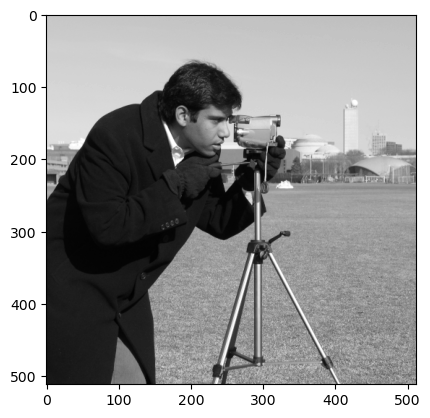

In [2]:
img = skimage.data.camera()
smaller_img = resize(img, (64, 64)) # Resize it just to make things quicker
plt.imshow(img, cmap='gray')

In [3]:
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2])
    return mgrid

In [4]:
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length)      # Inputs
print(X)
y = tf.reshape(smaller_img, [-1, 1])  # Outpus
print(y)

tf.Tensor(
[[-1.         -1.        ]
 [-0.96825397 -1.        ]
 [-0.93650794 -1.        ]
 ...
 [ 0.93650794  1.        ]
 [ 0.96825397  1.        ]
 [ 1.          1.        ]], shape=(4096, 2), dtype=float64)
tf.Tensor(
[[0.78220425]
 [0.7799337 ]
 [0.77849322]
 ...
 [0.57047961]
 [0.57755019]
 [0.57231675]], shape=(4096, 1), dtype=float64)


In [5]:
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model.compile(loss='mse', optimizer='sgd')

In [6]:
model.fit(X, y, epochs=8, batch_size=1)

Epoch 1/8
4096/4096 [==============================] - 3s 732us/step - loss: 0.0491
Epoch 2/8
4096/4096 [==============================] - 3s 731us/step - loss: 0.0320
Epoch 3/8
4096/4096 [==============================] - 3s 761us/step - loss: 0.0274
Epoch 4/8
4096/4096 [==============================] - 3s 710us/step - loss: 0.0252
Epoch 5/8
4096/4096 [==============================] - 3s 747us/step - loss: 0.0237
Epoch 6/8
4096/4096 [==============================] - 3s 647us/step - loss: 0.0222
Epoch 7/8
4096/4096 [==============================] - 3s 729us/step - loss: 0.0206
Epoch 8/8
4096/4096 [==============================] - 3s 749us/step - loss: 0.0192


In [7]:
# Our traning data is stored in 'X', so lets pass that
# into our trained model and see what it produces.
prediction = model.predict(X)

128/128 [==============================] - 0s 662us/step


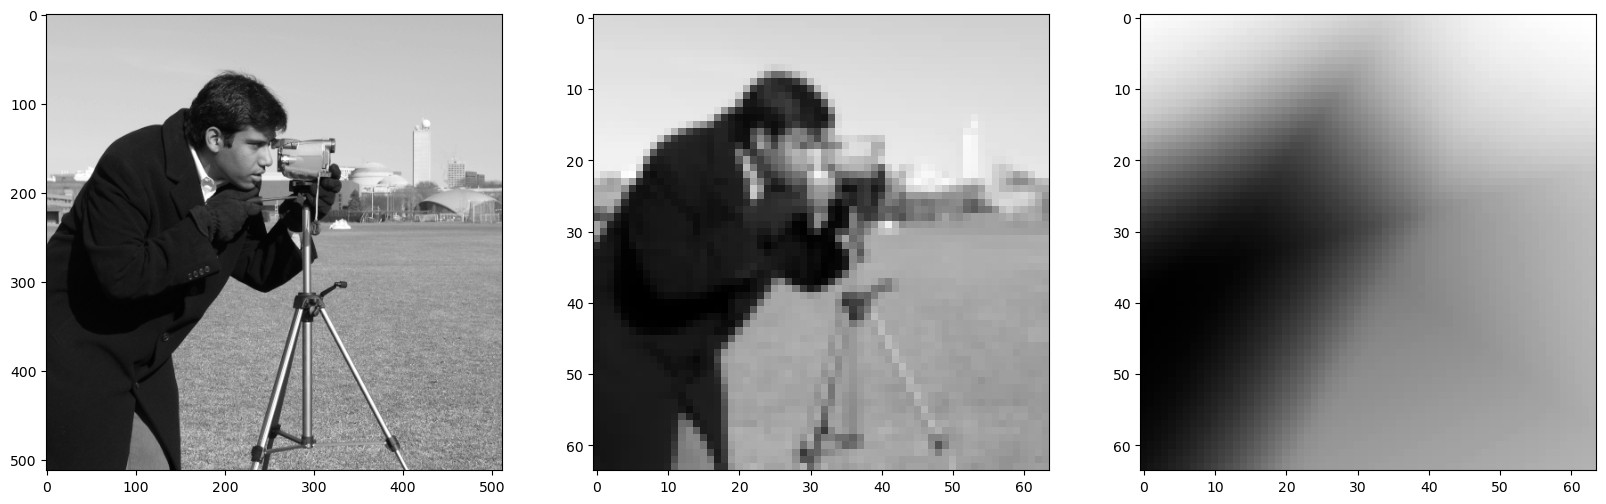

In [8]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img, cmap='gray')
axes_array[1].imshow(smaller_img, cmap='gray')
axes_array[2].imshow(reconstructed_img, cmap='gray')
plt.show()

# ------------Assignment Starting Here --------------
## 1: Grayscale -> RGB
Running through the code for an RBG image, ensuring that X and y correlate in shape over the channels.

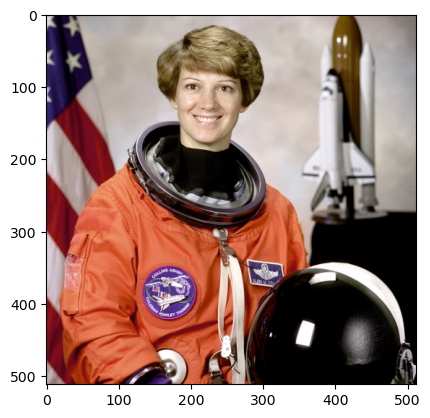

In [23]:
img = skimage.data.astronaut()
smaller_img = resize(img, (64, 64)) # Resize it just to make things quicker
plt.imshow(img) #removed the greyscale

In [10]:
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2])  #i changed the 1 from 2 originally
    return mgrid

In [11]:
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length) # Inputs
print(X) 
y = tf.reshape(smaller_img, [-1, 3])  #here y must be changed to 3 so it doesn't over extend
print(y) # Outputs

tf.Tensor(
[[-1.         -1.        ]
 [-0.96825397 -1.        ]
 [-0.93650794 -1.        ]
 ...
 [ 0.93650794  1.        ]
 [ 0.96825397  1.        ]
 [ 1.          1.        ]], shape=(4096, 2), dtype=float64)
tf.Tensor(
[[0.70964046 0.68814146 0.68855795]
 [0.26562802 0.23628451 0.30564371]
 [0.04468102 0.01924058 0.10589724]
 ...
 [0.14604117 0.13047849 0.09690988]
 [0.23639285 0.22030258 0.19621421]
 [0.17329964 0.16088136 0.1535328 ]], shape=(4096, 3), dtype=float64)


In [12]:
# Our model!
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')  
])
model.compile(loss='mse', optimizer='sgd')

#relu is the thing that pushes the value through each layer

In [13]:
model.fit(X, y, epochs=8, batch_size=1)

Epoch 1/8
4096/4096 [==============================] - 3s 638us/step - loss: 0.0764
Epoch 2/8
4096/4096 [==============================] - 2s 602us/step - loss: 0.0634
Epoch 3/8
4096/4096 [==============================] - 3s 704us/step - loss: 0.0594
Epoch 4/8
4096/4096 [==============================] - 3s 711us/step - loss: 0.0570
Epoch 5/8
4096/4096 [==============================] - 3s 642us/step - loss: 0.0555
Epoch 6/8
4096/4096 [==============================] - 3s 655us/step - loss: 0.0543
Epoch 7/8
4096/4096 [==============================] - 3s 674us/step - loss: 0.0535
Epoch 8/8
4096/4096 [==============================] - 3s 732us/step - loss: 0.0529


In [14]:
# Our traning data is stored in 'X', so lets pass that
# into our trained model and see what it produces.
prediction = model.predict(X)

128/128 [==============================] - 0s 568us/step


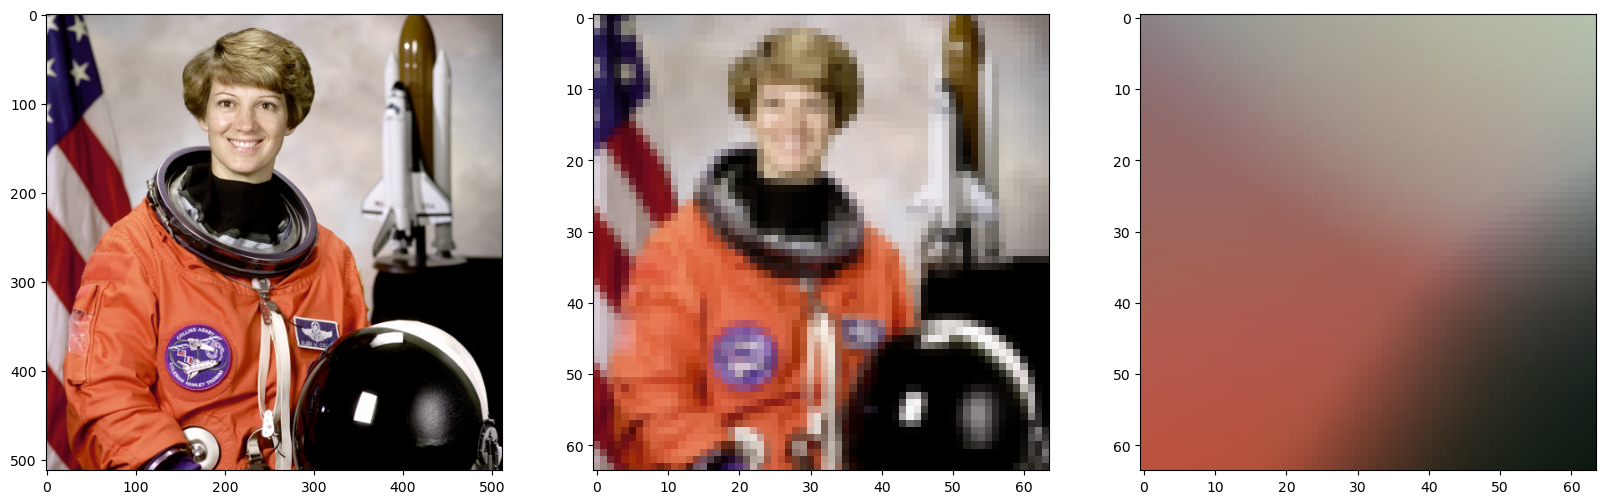

In [15]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64, 3))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

## 2: Adding Layers to the Network
Same as previous, but additional dense layers will be added to the network.

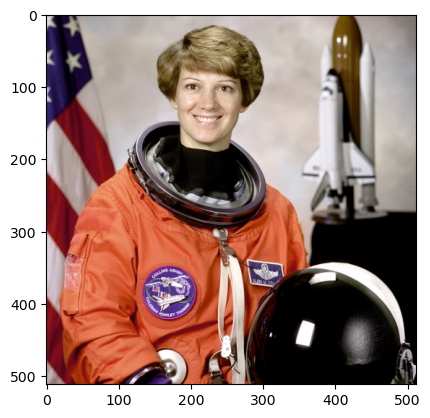

In [16]:
img = skimage.data.astronaut() 
smaller_img = resize(img, (64, 64)) # Resize it just to make things quicker
plt.imshow(img) #removed the greyscale

In [17]:
def get_mgrid(sidelen):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    width = tf.linspace(-1, 1, sidelen)
    height = tf.linspace(-1, 1, sidelen)
    mgrid = tf.stack(tf.meshgrid(width, height), axis=-1)
    mgrid = tf.reshape(mgrid, [-1, 2]) 
    return mgrid

In [18]:
image_side_length = smaller_img.shape[0]
X = get_mgrid(image_side_length) # Inputs
print(X) 
y = tf.reshape(smaller_img, [-1, 3])    #here y must be changed to 3 so it doesn't over extend
print(y) # Outputs

tf.Tensor(
[[-1.         -1.        ]
 [-0.96825397 -1.        ]
 [-0.93650794 -1.        ]
 ...
 [ 0.93650794  1.        ]
 [ 0.96825397  1.        ]
 [ 1.          1.        ]], shape=(4096, 2), dtype=float64)
tf.Tensor(
[[0.70964046 0.68814146 0.68855795]
 [0.26562802 0.23628451 0.30564371]
 [0.04468102 0.01924058 0.10589724]
 ...
 [0.14604117 0.13047849 0.09690988]
 [0.23639285 0.22030258 0.19621421]
 [0.17329964 0.16088136 0.1535328 ]], shape=(4096, 3), dtype=float64)


In [19]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'), #reLU should only be used in hidden layers
    Dense(12, activation='relu'), #added layer
    Dense(24, activation='relu'), #added layer
    Dense(3, activation='sigmoid')])  #layer must finish with 3 outputs for RGB
model.compile(loss='mse', optimizer='sgd')

In [20]:
model.fit(X, y, epochs=8, batch_size=1)

Epoch 1/8
4096/4096 [==============================] - 3s 680us/step - loss: 0.0784
Epoch 2/8
4096/4096 [==============================] - 3s 690us/step - loss: 0.0654
Epoch 3/8
4096/4096 [==============================] - 3s 759us/step - loss: 0.0559
Epoch 4/8
4096/4096 [==============================] - 3s 698us/step - loss: 0.0515
Epoch 5/8
4096/4096 [==============================] - 3s 753us/step - loss: 0.0495
Epoch 6/8
4096/4096 [==============================] - 3s 682us/step - loss: 0.0481
Epoch 7/8
4096/4096 [==============================] - 3s 718us/step - loss: 0.0473
Epoch 8/8
4096/4096 [==============================] - 3s 773us/step - loss: 0.0465


In [21]:
prediction = model.predict(X)

128/128 [==============================] - 0s 661us/step


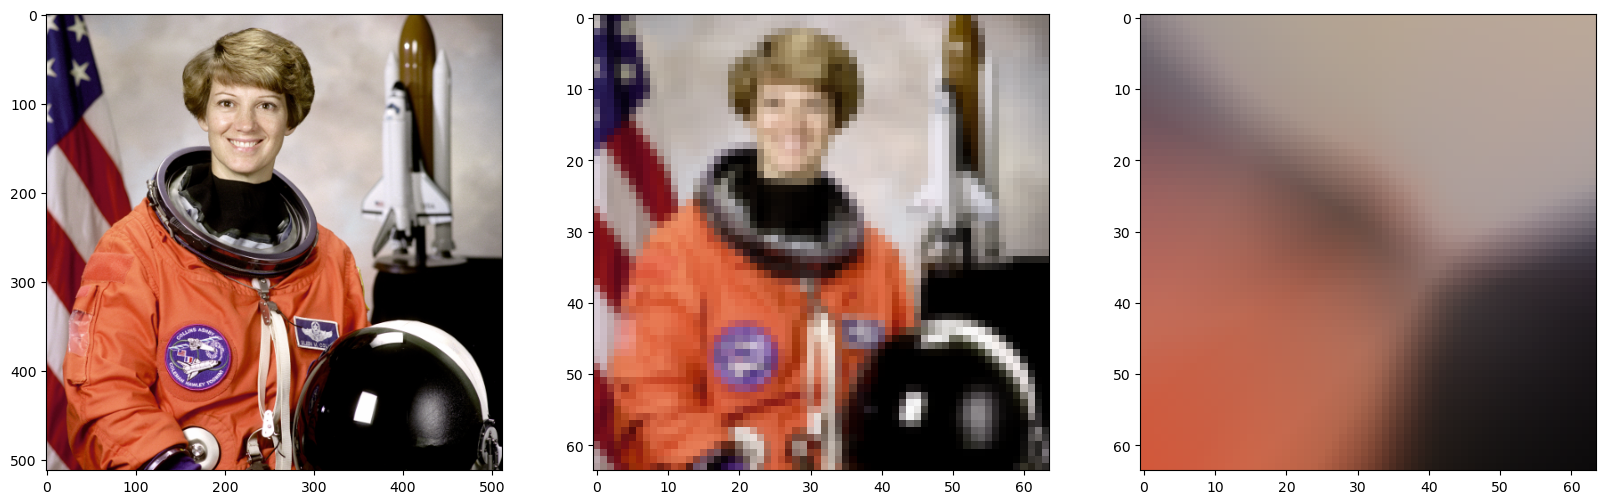

In [22]:
reconstructed_img = tf.reshape(prediction, (64, 64, 3))
reconstructed_img *= 255
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

#### Layer addition thoughts:
The final image of the 3 is more pixelated and I can notice that the black area surrounding the neck of the suit is more defined in third output in this one. It isn't as blended as the previous.

## 3: Experimenting with alternative activation functions and optimizers

In [26]:
prediction = model.predict(X)
print(prediction.shape)

128/128 [==============================] - 0s 651us/step
(4096, 3)


In [28]:
print(prediction[:10])
#this shows us the first 10 of all the 3 channels

[[0.5244226  0.48567313 0.5033725 ]
 [0.5433883  0.5029985  0.51751184]
 [0.56222916 0.5203166  0.5316231 ]
 [0.5808921  0.53758603 0.5456842 ]
 [0.59989244 0.55428666 0.557881  ]
 [0.6171333  0.5706206  0.5682728 ]
 [0.6306033  0.5859479  0.5753356 ]
 [0.6379252  0.59491575 0.5789115 ]
 [0.64439005 0.6017629  0.5812641 ]
 [0.64870304 0.60602605 0.5832342 ]]


In [29]:
min_val = prediction.min()
max_val = prediction.max()
print(min_val, max_val)
#sigmoid function shows us the min/max values are between [0,1]

0.043049477 0.825293


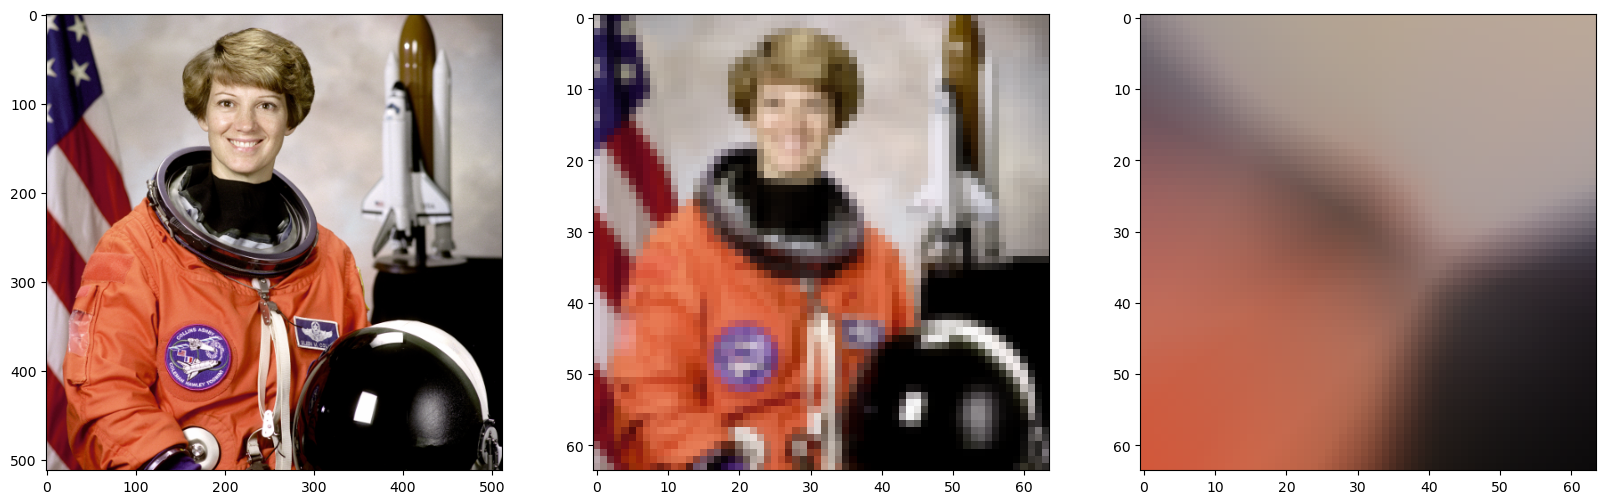

In [31]:
# so if we do some more data reshaping, this can be called into a function.

def view_output(prediction, image_shape=(64,64, 3)):
    #Reshape it from 1D to 2D
    reconstructed_img = tf.reshape(prediction, image_shape)
        #Scale the values from [0,1] to [0, 255]
    reconstructed_img *= 255
        #Convert the tensor into a numpy array, and cast the type into a uint8.
    reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
    
    #Look at our creation next to the original versions.
    fig, axes_array = plt.subplots(1,3, figsize=(20,10))
    axes_array[0].imshow(img)
    axes_array[1].imshow(smaller_img)
    axes_array[2].imshow(reconstructed_img)
    plt.show()
    
view_output(prediction)

In [32]:
#Change is the optimizer, and I'm going to use Adaptive Moment Estimation, or ADAM. 
# The optimizer determines how and at what rate the weights of the network are updated.
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=16, batch_size=1)

Epoch 1/16
4096/4096 [==============================] - 4s 822us/step - loss: 0.0439
Epoch 2/16
4096/4096 [==============================] - 3s 812us/step - loss: 0.0392
Epoch 3/16
4096/4096 [==============================] - 3s 814us/step - loss: 0.0367
Epoch 4/16
4096/4096 [==============================] - 3s 760us/step - loss: 0.0355
Epoch 5/16
4096/4096 [==============================] - 3s 819us/step - loss: 0.0336
Epoch 6/16
4096/4096 [==============================] - 3s 741us/step - loss: 0.0318
Epoch 7/16
4096/4096 [==============================] - 3s 800us/step - loss: 0.0304
Epoch 8/16
4096/4096 [==============================] - 3s 813us/step - loss: 0.0292
Epoch 9/16
4096/4096 [==============================] - 5s 1ms/step - loss: 0.0277
Epoch 10/16
4096/4096 [==============================] - 3s 785us/step - loss: 0.0267
Epoch 11/16
4096/4096 [==============================] - 3s 769us/step - loss: 0.0264
Epoch 12/16
4096/4096 [==============================] - 3s 807us

128/128 [==============================] - 0s 592us/step


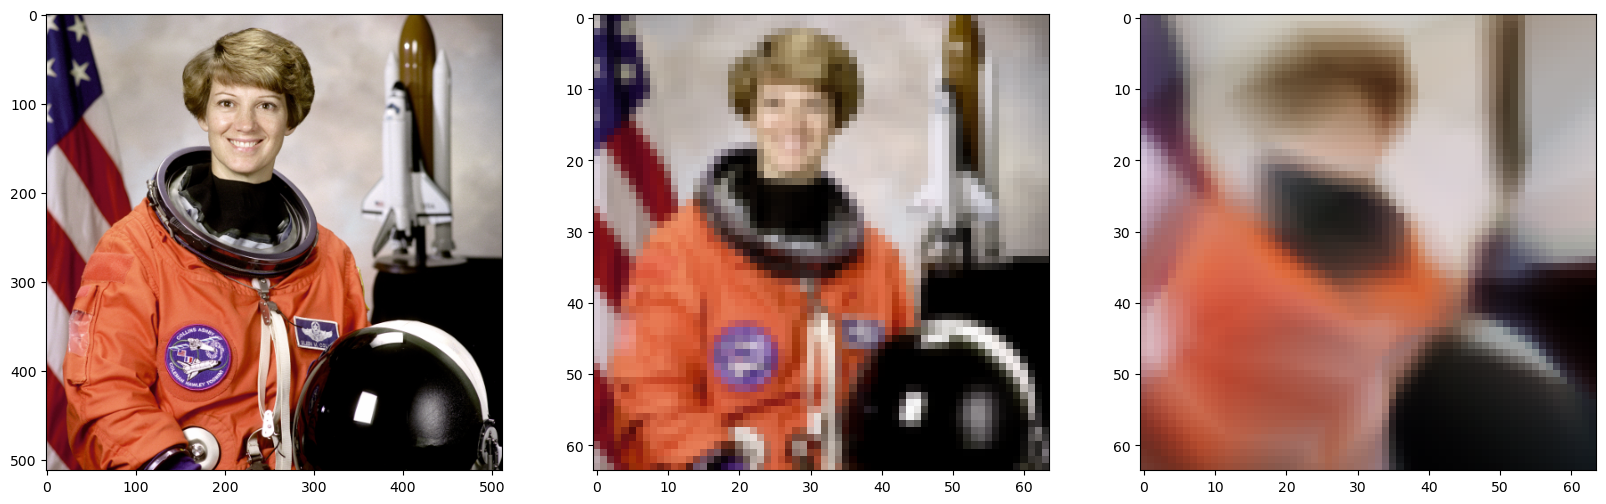

In [33]:
new_prediction = model.predict(X)
view_output(new_prediction)

The loss here is a lot lower than previous runs. (Now 0.02... compared to 0.04... previously)

512/512 [==============================] - 0s 580us/step


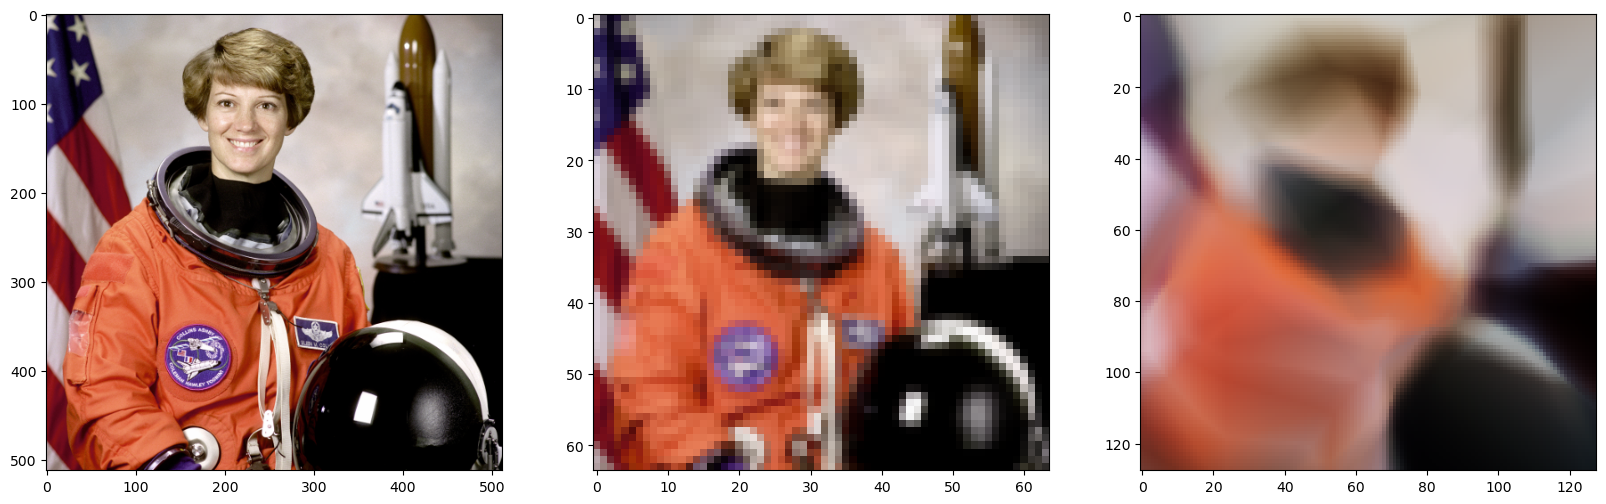

In [36]:
bigger_X = get_mgrid(128)
bigger_prediction = model.predict(bigger_X)
view_output(bigger_prediction, image_shape=(128, 128, 3)) #(additonal 3 parameter needed for RGB image)

2048/2048 [==============================] - 1s 607us/step


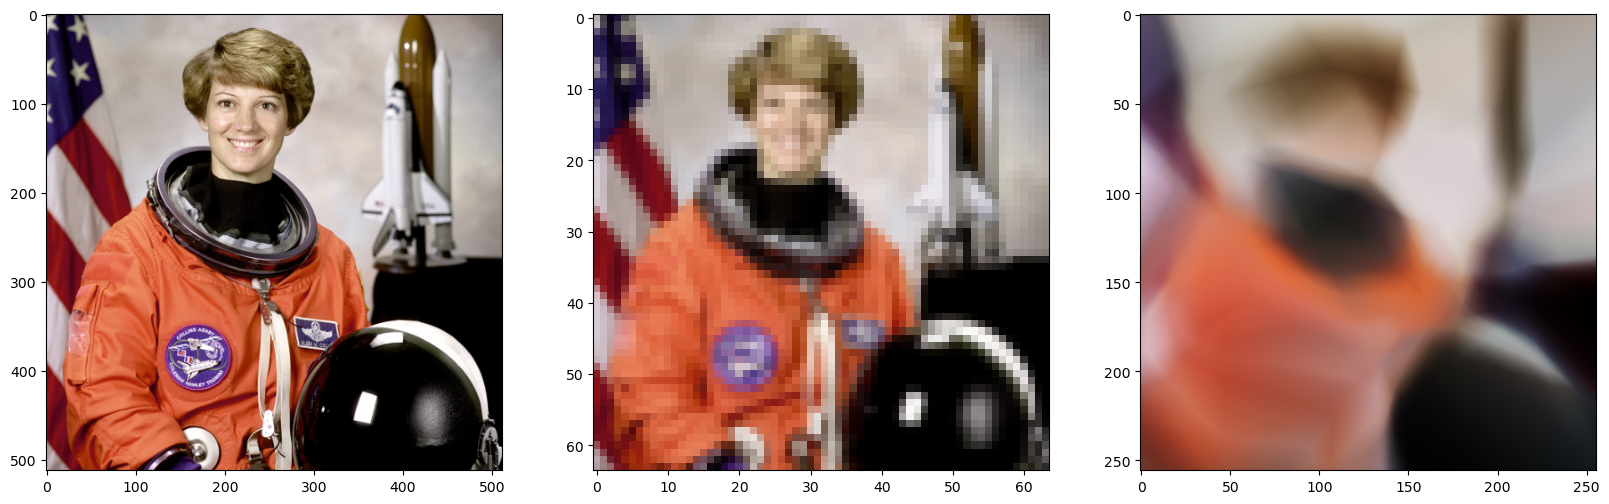

In [37]:
# adapting the output resultion.

bigger_X = get_mgrid(256)
bigger_prediction = model.predict(bigger_X)
view_output(bigger_prediction, image_shape=(256, 256, 3)) #(additonal 3 parameter needed for RGB image)

32768/32768 [==============================] - 19s 587us/step


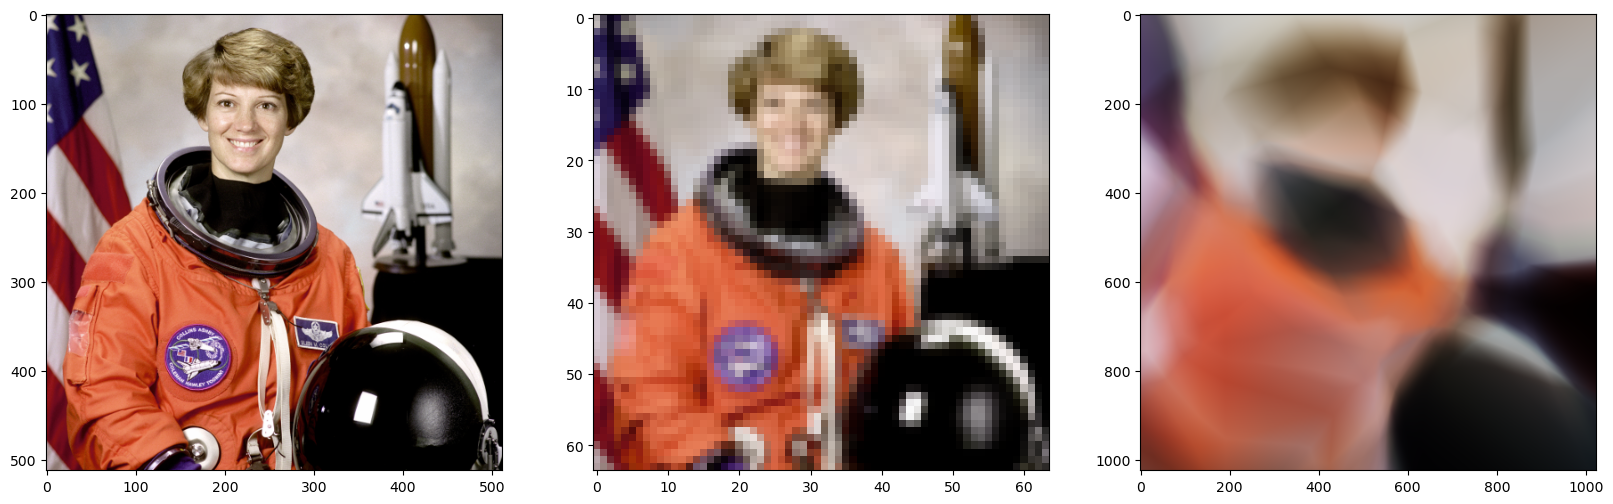

In [38]:
bigger_X = get_mgrid(1024)
bigger_prediction = model.predict(bigger_X)
view_output(bigger_prediction, image_shape=(1024, 1024, 3)) #(additonal 3 parameter needed for RGB image)

It's hard to tell the difference here, but when I zoom in, I can define the pixels on the 128 version in comeparison to the others; the quality of the warping is by far smoother as I thought. The quality has improved. This is a performance of a super resolution. 

## Extending the input co-ordinates for fun. 
##### Giving the model any 2 numbers/ old co-ordinates:

In [42]:
a = model.predict([[0, 0]])
b = model.predict([[-8, 8]])
c = model.predict([[27, 71]])
print(a, b, c)

1/1 [==============================] - 0s 28ms/step
[[0.22098777 0.16400318 0.14708775]] [[1. 1. 1.]] [[0.0000000e+00 0.0000000e+00 7.2986895e-28]]


In [43]:
def get_arbitrary_mgrid(sidelen, limits=(-1, 1)):
    '''Generates an arbitrary flattened grid of (x,y,...) coordinates of specified limits.'''
    width = np.linspace(*limits, sidelen)
    height = np.linspace(*limits, sidelen)
    mgrid = np.stack(np.meshgrid(width, height), axis=-1)
    mgrid = np.reshape(mgrid, [-1, 2])
    return mgrid

512/512 [==============================] - 0s 568us/step


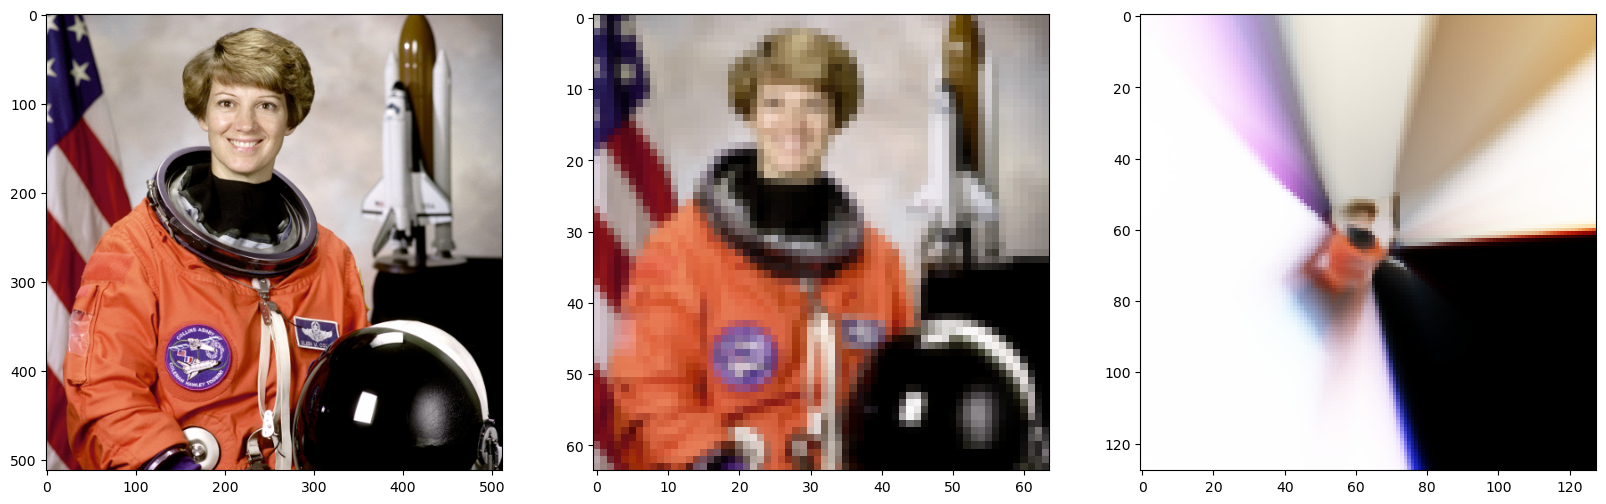

In [44]:
arbitrary_X = get_arbitrary_mgrid(128, limits=(-5, 5))
arbitrary_prediction = model.predict(arbitrary_X)
view_output(arbitrary_prediction, image_shape=(128, 128, 3)) #3 needed for RGB

Tiny warped astronaut!

## 3: Experimenting with Alternative Activation Functions and Optimizers CONTINUED

##### First using: activation = softmax, optimizer= rmsprop
   > Softmax: used mainly for classification tasks. Sum of all classes would add up to 1
   
   > Rmsprop: restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. 

In [45]:
# more layers added!
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(12, activation='relu'),
    Dense(24, activation='relu'),
    Dense(48, activation='relu'),
    Dense(75, activation='relu'),
    Dense(56, activation='relu'),
    Dense(14, activation='relu'),
    Dense(3, activation='softmax')])  #must finish with 3 outputs
model.compile(loss='mse', optimizer='rmsprop')

In [46]:
model.fit(X, y, epochs=16, batch_size=1)

Epoch 1/16
4096/4096 [==============================] - 5s 993us/step - loss: 0.0901
Epoch 2/16
4096/4096 [==============================] - 4s 923us/step - loss: 0.0892
Epoch 3/16
4096/4096 [==============================] - 4s 931us/step - loss: 0.0888
Epoch 4/16
4096/4096 [==============================] - 4s 951us/step - loss: 0.0885
Epoch 5/16
4096/4096 [==============================] - 4s 924us/step - loss: 0.0883
Epoch 6/16
4096/4096 [==============================] - 4s 938us/step - loss: 0.0882
Epoch 7/16
4096/4096 [==============================] - 4s 871us/step - loss: 0.0881
Epoch 8/16
4096/4096 [==============================] - 4s 962us/step - loss: 0.0880
Epoch 9/16
4096/4096 [==============================] - 4s 939us/step - loss: 0.0878
Epoch 10/16
4096/4096 [==============================] - 4s 943us/step - loss: 0.0878
Epoch 11/16
4096/4096 [==============================] - 4s 924us/step - loss: 0.0877
Epoch 12/16
4096/4096 [==============================] - 4s 907

In [47]:
prediction = model.predict(X)

128/128 [==============================] - 0s 712us/step


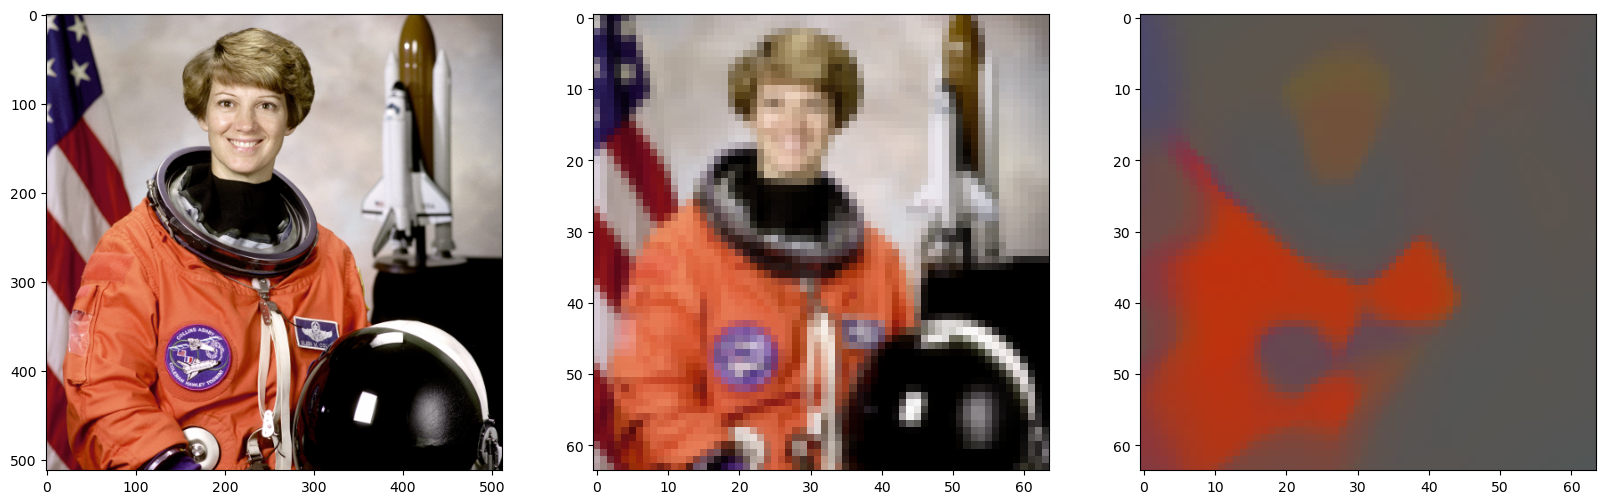

In [48]:
#Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64, 3))
#Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
#Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)

#Look at our output next to the originals
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

I almost feel like this has learnt it 'too well' in that the output is left with primarily only 3 colours - the red/orange of the space suit, pale aspect of the face and hair and the background.

##### Now using activation = softmax, optimizer= sgd

In [58]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(12, activation='relu'), #adding 2 more dense layers from here
    Dense(24, activation='relu'),
    Dense(48, activation='relu'),
    Dense(75, activation='relu'),
    Dense(56, activation='relu'),
    Dense(14, activation='relu'),
    Dense(3, activation='softmax')])  #must finish with 3 outputs
model.compile(loss='mse', optimizer='sgd')

In [59]:
model.fit(X, y, epochs=16, batch_size=1)

Epoch 1/16
4096/4096 [==============================] - 3s 695us/step - loss: 0.0950
Epoch 2/16
4096/4096 [==============================] - 3s 761us/step - loss: 0.0939
Epoch 3/16
4096/4096 [==============================] - 3s 732us/step - loss: 0.0927
Epoch 4/16
4096/4096 [==============================] - 3s 721us/step - loss: 0.0910
Epoch 5/16
4096/4096 [==============================] - 3s 743us/step - loss: 0.0901
Epoch 6/16
4096/4096 [==============================] - 3s 747us/step - loss: 0.0898
Epoch 7/16
4096/4096 [==============================] - 3s 684us/step - loss: 0.0897
Epoch 8/16
4096/4096 [==============================] - 3s 700us/step - loss: 0.0895
Epoch 9/16
4096/4096 [==============================] - 3s 726us/step - loss: 0.0894
Epoch 10/16
4096/4096 [==============================] - 4s 887us/step - loss: 0.0894
Epoch 11/16
4096/4096 [==============================] - 3s 795us/step - loss: 0.0893
Epoch 12/16
4096/4096 [==============================] - 3s 735

In [60]:
prediction = model.predict(X)

128/128 [==============================] - 0s 931us/step


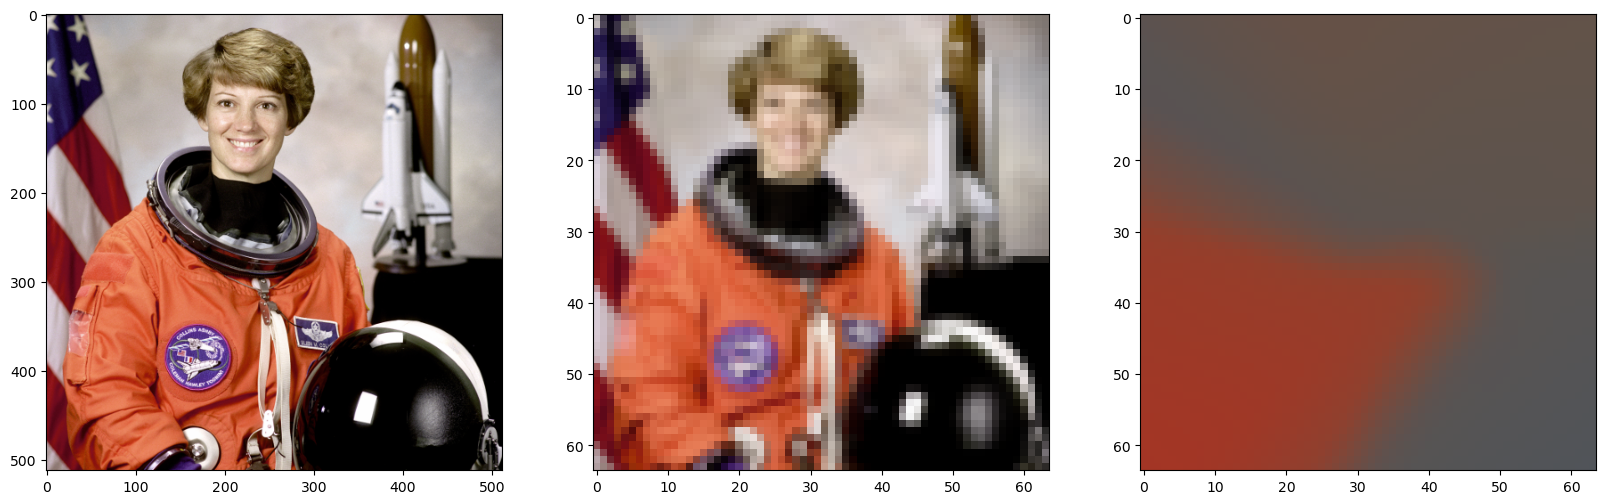

In [61]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64, 3))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

##### Now using: activation = sigmoid, optimizer= rmsprop

In [62]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(12, activation='relu'),
    Dense(24, activation='relu'),
    Dense(48, activation='relu'),
    Dense(75, activation='relu'),
    Dense(56, activation='relu'),
    Dense(14, activation='relu'),
    Dense(3, activation='sigmoid')])  #must finish with 3 outputs
model.compile(loss='mse', optimizer='rmsprop')

In [63]:
model.fit(X, y, epochs=16, batch_size=1)

Epoch 1/16
4096/4096 [==============================] - 4s 905us/step - loss: 0.0574
Epoch 2/16
4096/4096 [==============================] - 4s 885us/step - loss: 0.0505
Epoch 3/16
4096/4096 [==============================] - 4s 860us/step - loss: 0.0463
Epoch 4/16
4096/4096 [==============================] - 3s 815us/step - loss: 0.0442
Epoch 5/16
4096/4096 [==============================] - 4s 924us/step - loss: 0.0435
Epoch 6/16
4096/4096 [==============================] - 4s 955us/step - loss: 0.0417
Epoch 7/16
4096/4096 [==============================] - 4s 910us/step - loss: 0.0401
Epoch 8/16
4096/4096 [==============================] - 4s 960us/step - loss: 0.0385
Epoch 9/16
4096/4096 [==============================] - 4s 979us/step - loss: 0.0377
Epoch 10/16
4096/4096 [==============================] - 4s 877us/step - loss: 0.0364
Epoch 11/16
4096/4096 [==============================] - 4s 858us/step - loss: 0.0353
Epoch 12/16
4096/4096 [==============================] - 4s 904

In [64]:
prediction = model.predict(X)

128/128 [==============================] - 0s 658us/step


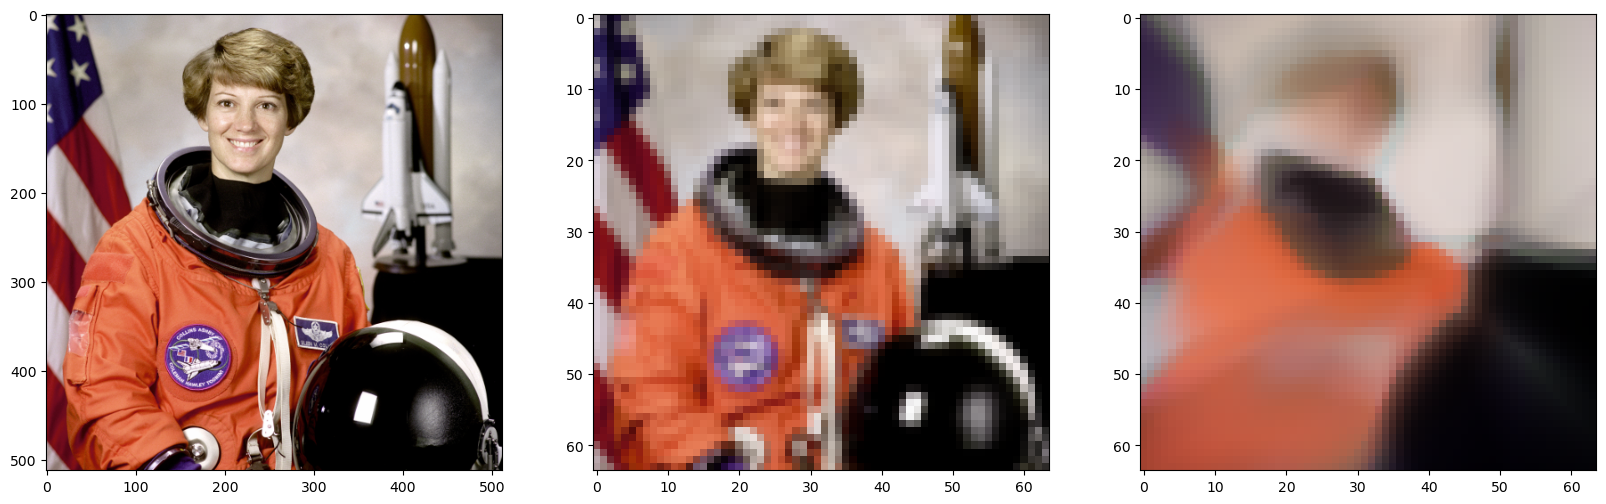

In [65]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64, 3))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

##### Now using: activation = tanh, optimizer= sdg
   > Tanh:  returns the hyperbolic tangent of a number.
   
   > sgd: Stochastic gradient descent is an optimization algorithm often used in machine learning applications to find the model parameters that correspond to the best fit between predicted and actual outputs. It's an inexact but powerful technique. REF: https://realpython.com/gradient-descent-algorithm-python/#:~:text=Stochastic%20gradient%20descent%20is%20an,an%20inexact%20but%20powerful%20technique.

In [67]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(12, activation='relu'), #adding 2 more dense layers from here
    Dense(24, activation='relu'),
    Dense(48, activation='relu'),
    Dense(75, activation='relu'),
    Dense(56, activation='relu'),
    Dense(14, activation='relu'),
    Dense(3, activation='tanh')])  #must finish with 3 outputs
model.compile(loss='mse', optimizer='sgd')

In [68]:
model.fit(X, y, epochs=8, batch_size=1)

Epoch 1/8
4096/4096 [==============================] - 4s 821us/step - loss: 0.0698
Epoch 2/8
4096/4096 [==============================] - 3s 775us/step - loss: 0.0538
Epoch 3/8
4096/4096 [==============================] - 3s 790us/step - loss: 0.0484
Epoch 4/8
4096/4096 [==============================] - 3s 724us/step - loss: 0.0466
Epoch 5/8
4096/4096 [==============================] - 3s 762us/step - loss: 0.0453
Epoch 6/8
4096/4096 [==============================] - 3s 757us/step - loss: 0.0440
Epoch 7/8
4096/4096 [==============================] - 3s 743us/step - loss: 0.0429
Epoch 8/8
4096/4096 [==============================] - 3s 705us/step - loss: 0.0415


In [69]:
prediction = model.predict(X)

128/128 [==============================] - 0s 824us/step


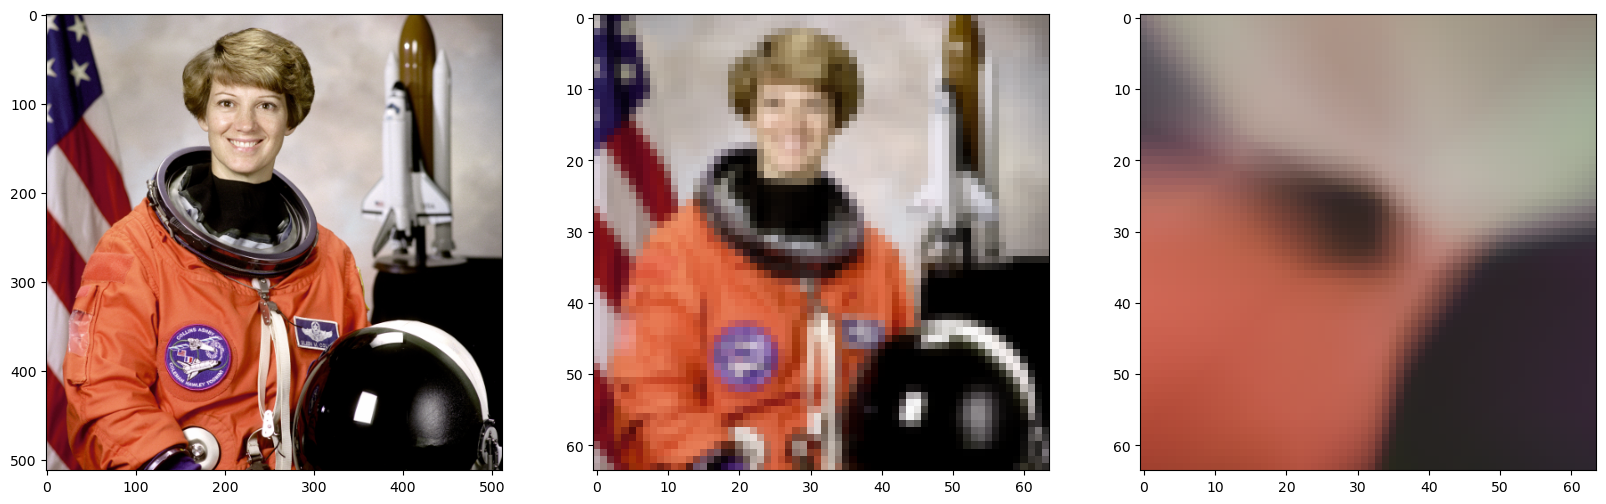

In [70]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64, 3))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

##### Now using: activation = tanh, optimiser + rmsprop

In [71]:
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(12, activation='relu'), #adding 2 more dense layers from here
    Dense(24, activation='relu'),
    Dense(48, activation='relu'),
    Dense(75, activation='relu'),
    Dense(56, activation='relu'),
    Dense(14, activation='relu'),
    Dense(3, activation='tanh')])  #must finish with 3 outputs
model.compile(loss='mse', optimizer='rmsprop')

In [72]:
model.fit(X, y, epochs=8, batch_size=1)

Epoch 1/8
4096/4096 [==============================] - 4s 954us/step - loss: 0.0565
Epoch 2/8
4096/4096 [==============================] - 4s 911us/step - loss: 0.0498
Epoch 3/8
4096/4096 [==============================] - 4s 998us/step - loss: 0.0461
Epoch 4/8
4096/4096 [==============================] - 4s 964us/step - loss: 0.0438
Epoch 5/8
4096/4096 [==============================] - 4s 973us/step - loss: 0.0425
Epoch 6/8
4096/4096 [==============================] - 4s 980us/step - loss: 0.0406
Epoch 7/8
4096/4096 [==============================] - 4s 954us/step - loss: 0.0397
Epoch 8/8
4096/4096 [==============================] - 4s 1ms/step - loss: 0.0385


In [73]:
prediction = model.predict(X)

128/128 [==============================] - 0s 724us/step


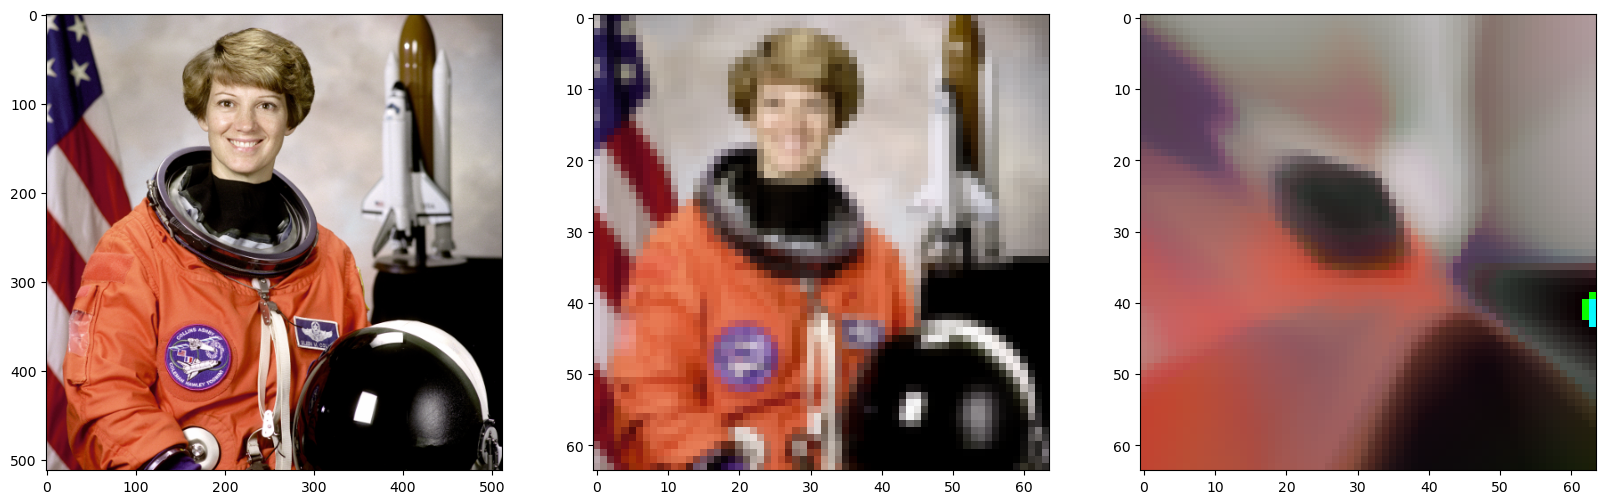

In [74]:
# Reshape it from 1D to 2D
reconstructed_img = tf.reshape(prediction, (64, 64, 3))
# Scale the values from [0,1] to [0, 255]
reconstructed_img *= 255
# Convert the tensor into a numpy array, and cast the type into a uint8.
reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
# Look at our creation next to the original!
fig, axes_array = plt.subplots(1,3, figsize=(20,10))
axes_array[0].imshow(img)
axes_array[1].imshow(smaller_img)
axes_array[2].imshow(reconstructed_img)
plt.show()

This one is my favourite, it has created somewhat of a reflective pattern across a negative diagonal.

## 4: How the image we have created differs from a normal image?

 - CPPNs are an extension from previously propsed NNs. They use genetic algorithms to train and optimize the parameters of a NN. 
 - So they optimize sets of weights through a computers natural selection. 
 - It takes into consideration pixel co-ordinates and maps a single colour value. 
 - The weights essentially mutate over repeated training leaving the outputs looking blurred/ smoothed and warped from an original image input of respectable RBG values across an image plane. 
 - Warped in respected to the activation function used in the training. Hence the previous box by example.
